In [1]:
import numpy as np
import matplotlib.pyplot as plt
from funcs import *
from stats import *

from iminuit import Minuit
from iminuit.cost import LeastSquares

In [2]:
R_L = 39.4
R_g = 68
C_val = 49e-9

# Funcs

In [104]:
def V_sott(t, R, L, C, V_o):
    '''tensione resistenza in regime sottosmorzato'''
    gamma = R/(2*L)
    omega = 1/np.sqrt(float(L*C))

    return R*C*V_o*np.exp(-gamma*t)*(gamma*np.cos(omega*t) + omega*np.sin(omega*t))

def V_crit(t, R, L, C, V_o):
    '''tensione resistenza in regime criticamente smorzato'''
    gamma = R/(2*L)
    
    return V_o * R * (gamma**2) * t * np.exp(-gamma*t)

def V_sovr(t, R, L, C, V_o):
    '''tensione resistenza in regime sovrasmorzato'''
    gamma = R/(2*L)
    omega = 1/np.sqrt(float(L*C))
    betha = np.sqrt(np.power(gamma,2) - np.power(omega,2))
    
    return V_o*R*(omega**2)*(np.exp(-t*(gamma-betha)) - np.exp(-t*(gamma+betha)))/(2*betha)

# RLC

# R = 30 $\Omega$

87


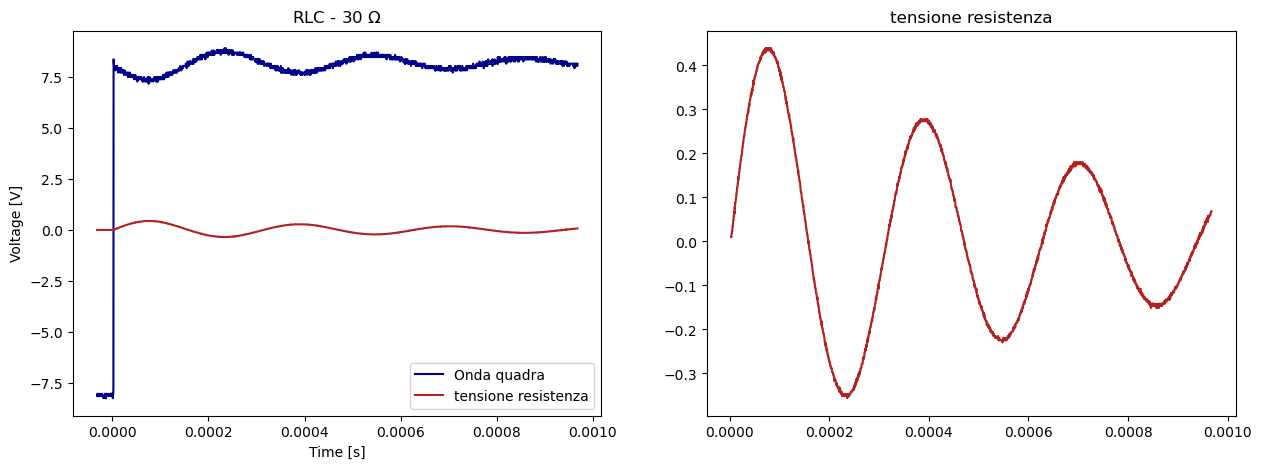

In [49]:
RLC_30_quadra, RLC_30_res, RLC_30_ind = get_data("data/RLC_30/")
if RLC_30_ind[1] == None:   RLC_30_ind = RLC_30_quadra[0], (RLC_30_quadra[1] - RLC_30_res[1])

cut = True

i = 0
if cut:
    v = RLC_30_quadra[1][0]
    while(v < np.max(RLC_30_quadra[1][:100])):
        v = RLC_30_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 30 $\Omega$')
plt.plot(RLC_30_quadra[0][:],RLC_30_quadra[1][:], c='darkblue')
plt.plot(RLC_30_res[0][:],  RLC_30_res[1][:],   c='firebrick')
# plt.plot(RLC_30_ind[0][:],  RLC_30_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_30_res[0][i:],  RLC_30_res[1][i:],   c='firebrick')

In [52]:
c = LeastSquares(RLC_30_res[0][87:], RLC_30_res[1][87:], 0.01, V_sott)
m = Minuit(c, R=30+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5450 (χ²/ndof = 2.3)       │              Nfcn = 216              │
│ EDM = 4.1e-08 (Goal: 0.0002)     │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    134    │     6     │            │            │         │         │       │
│ 1 │ L    │  0.0502   │  0.0022   │            │            │         │         │       │
│ 2 │ C    │  50.4e-9  │  2.2e-9   │            │            │         │         │       │
│ 3 │ V_o  │   3.477   │   0.008   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────┐
│     │                R                L                C              V_o │
├─────┼─────────────────────────────────────────────────────────────────────┤
│   R │             33.4        12.422e-3 -12.476857040e-9         -3.05e-3 │
│   L │        12.422e-3         4.65e-06    -4.670438e-12            -0e-6 │
│   C │ -12.476857040e-9    -4.670438e-12         4.69e-18       13.019e-15 │
│ V_o │         -3.05e-3            -0e-6       13.019e-15         6.08e-05 │
└─────┴─────────────────────────────────────────────────────────────────────┘

# R = 100 $\Omega$

87


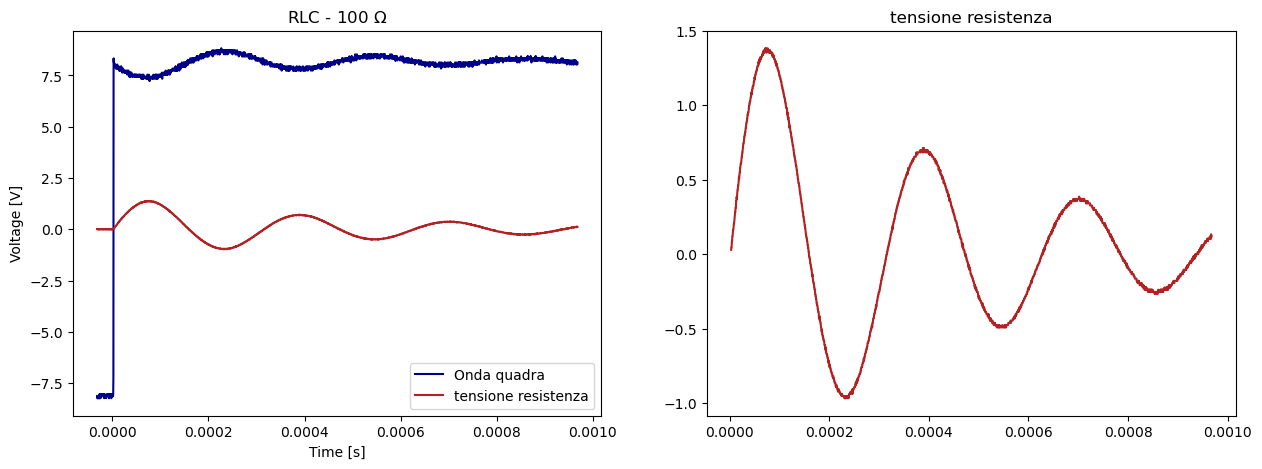

In [53]:
RLC_100_quadra, RLC_100_res, RLC_100_ind = get_data("data/RLC_100/")
if RLC_100_ind[1] == None:   RLC_100_ind = RLC_100_quadra[0], (RLC_100_quadra[1] - RLC_100_res[1])

cut = True

i = 0
if cut:
    v = RLC_100_quadra[1][0]
    while(v < np.max(RLC_100_quadra[1][:100])):
        v = RLC_100_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 100 $\Omega$')
plt.plot(RLC_100_quadra[0][:],RLC_100_quadra[1][:], c='darkblue')
plt.plot(RLC_100_res[0][:],  RLC_100_res[1][:],   c='firebrick')
# plt.plot(RLC_100_ind[0][:],  RLC_100_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_100_res[0][i:],  RLC_100_res[1][i:],   c='firebrick')

In [54]:
c = LeastSquares(RLC_100_res[0][87:], RLC_100_res[1][87:], 0.01, V_sott)
m = Minuit(c, R=100+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 8.171e+04 (χ²/ndof = 33.9) │              Nfcn = 102              │
│ EDM = 3.11e-07 (Goal: 0.0002)    │            time = 0.1 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │   221.1   │    3.5    │            │            │         │         │       │
│ 1 │ L    │  56.0e-3  │  0.9e-3   │            │            │         │         │       │
│ 2 │ C    │  46.0e-9  │  0.7e-9   │            │            │         │         │       │
│ 3 │ V_o  │   7.496   │   0.005   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────┐
│     │                R                L                C              V_o │
├─────┼─────────────────────────────────────────────────────────────────────┤
│   R │             12.4        3.1261e-3 -2.5691136677e-9        -0.821e-3 │
│   L │        3.1261e-3         7.91e-07    -650.1115e-15               -0 │
│   C │ -2.5691136677e-9    -650.1115e-15         5.34e-19       3.4445e-15 │
│ V_o │        -0.821e-3               -0       3.4445e-15         2.32e-05 │
└─────┴─────────────────────────────────────────────────────────────────────┘

## R = 300 $\Omega$

87


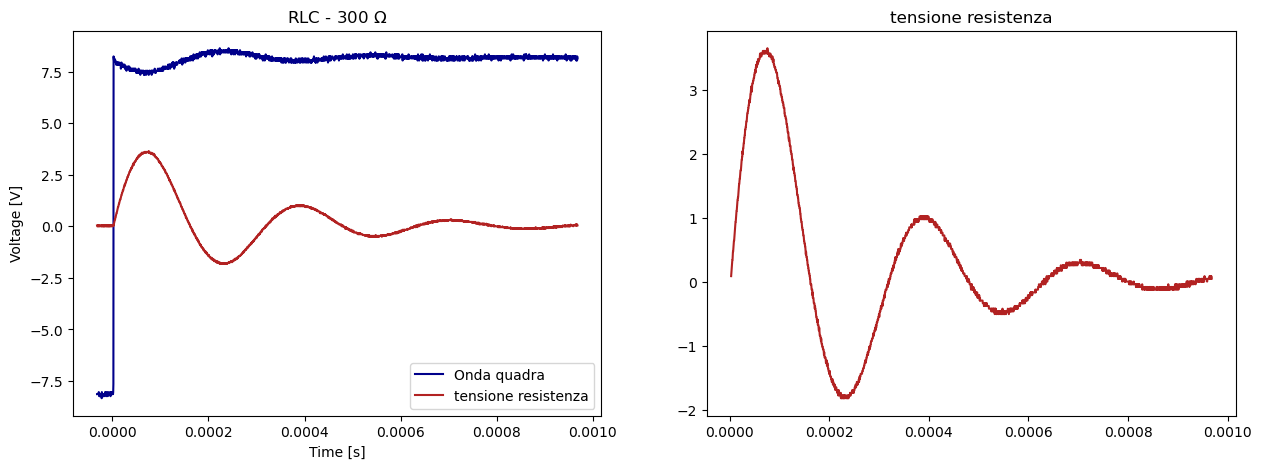

In [56]:
RLC_300_quadra, RLC_300_res, RLC_300_ind = get_data("data/RLC_300/")
if RLC_300_ind[1] == None:   RLC_300_ind = RLC_300_quadra[0], (RLC_300_quadra[1] - RLC_300_res[1])

cut = True

i = 0
if cut:
    v = RLC_300_quadra[1][0]
    while(v < np.max(RLC_300_quadra[1][:300])):
        v = RLC_300_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 300 $\Omega$')
plt.plot(RLC_300_quadra[0][:],RLC_300_quadra[1][:], c='darkblue')
plt.plot(RLC_300_res[0][:],  RLC_300_res[1][:],   c='firebrick')
# plt.plot(RLC_300_ind[0][:],  RLC_300_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_300_res[0][i:],  RLC_300_res[1][i:],   c='firebrick')

In [57]:
c = LeastSquares(RLC_300_res[0][87:], RLC_300_res[1][87:], 0.01, V_sott)
m = Minuit(c, R=300+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.342e+05 (χ²/ndof = 388.0)│              Nfcn = 119              │
│ EDM = 5.44e-09 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │    416    │     4     │            │            │         │         │       │
│ 1 │ L    │  58.7e-3  │  0.6e-3   │            │            │         │         │       │
│ 2 │ C    │  47.6e-9  │  0.5e-9   │            │            │         │         │       │
│ 3 │ V_o  │  11.248   │   0.003   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────┐
│     │                 R                 L                 C               V_o │
├─────┼─────────────────────────────────────────────────────────────────────────┤
│   R │              15.8        2.23195e-3 -1.81010470150e-9           -395e-6 │
│   L │        2.23195e-3          3.15e-07    -255.64887e-15          -0.01e-6 │
│   C │ -1.81010470150e-9    -255.64887e-15          2.07e-19       4.78904e-15 │
│ V_o │           -395e-6          -0.01e-6       4.78904e-15          9.15e-06 │
└─────┴─────────────────────────────────────────────────────────────────────────┘

# R = 700 $\Omega$

87


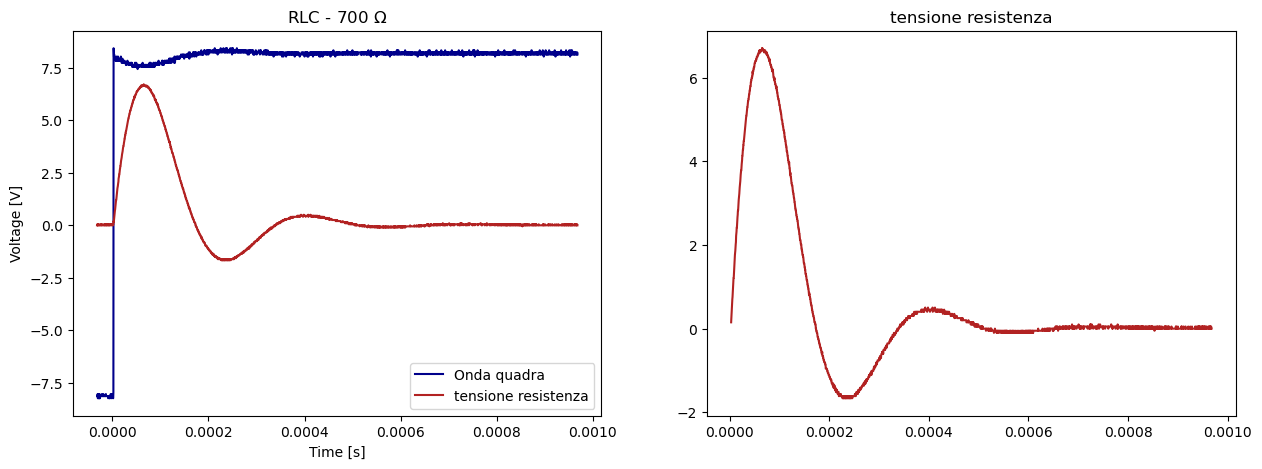

In [58]:
RLC_700_quadra, RLC_700_res, RLC_700_ind = get_data("data/RLC_700/")
if RLC_700_ind[1] == None:   RLC_700_ind = RLC_700_quadra[0], (RLC_700_quadra[1] - RLC_700_res[1])

cut = True

i = 0
if cut:
    v = RLC_700_quadra[1][0]
    while(v < np.max(RLC_700_quadra[1][:700])):
        v = RLC_700_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 700 $\Omega$')
plt.plot(RLC_700_quadra[0][:],RLC_700_quadra[1][:], c='darkblue')
plt.plot(RLC_700_res[0][:],  RLC_700_res[1][:],   c='firebrick')
# plt.plot(RLC_700_ind[0][:],  RLC_700_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_700_res[0][i:],  RLC_700_res[1][i:],   c='firebrick')

In [59]:
c = LeastSquares(RLC_700_res[0][87:], RLC_700_res[1][87:], 0.01, V_sott)
m = Minuit(c, R=700+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 5.07e+06 (χ²/ndof = 2105.5)│              Nfcn = 99               │
│ EDM = 1.98e-06 (Goal: 0.0002)    │            time = 0.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  731.65   │   0.13    │            │            │         │         │       │
│ 1 │ L    │ 67.105e-3 │ 0.005e-3  │            │            │         │         │       │
│ 2 │ C    │ 54.449e-9 │ 0.007e-9  │            │            │         │         │       │
│ 3 │ V_o  │  12.1791  │  0.0023   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────┐
│     │                R                L                C              V_o │
├─────┼─────────────────────────────────────────────────────────────────────┤
│   R │           0.0159       202.594e-9 326.18502726e-15          -213e-6 │
│   L │       202.594e-9         2.86e-11     -5.22016e-18        -0.786e-9 │
│   C │ 326.18502726e-15     -5.22016e-18         4.77e-23 -10.28029777e-15 │
│ V_o │          -213e-6        -0.786e-9 -10.28029777e-15         5.39e-06 │
└─────┴─────────────────────────────────────────────────────────────────────┘

# R = 1000 $\Omega$

87


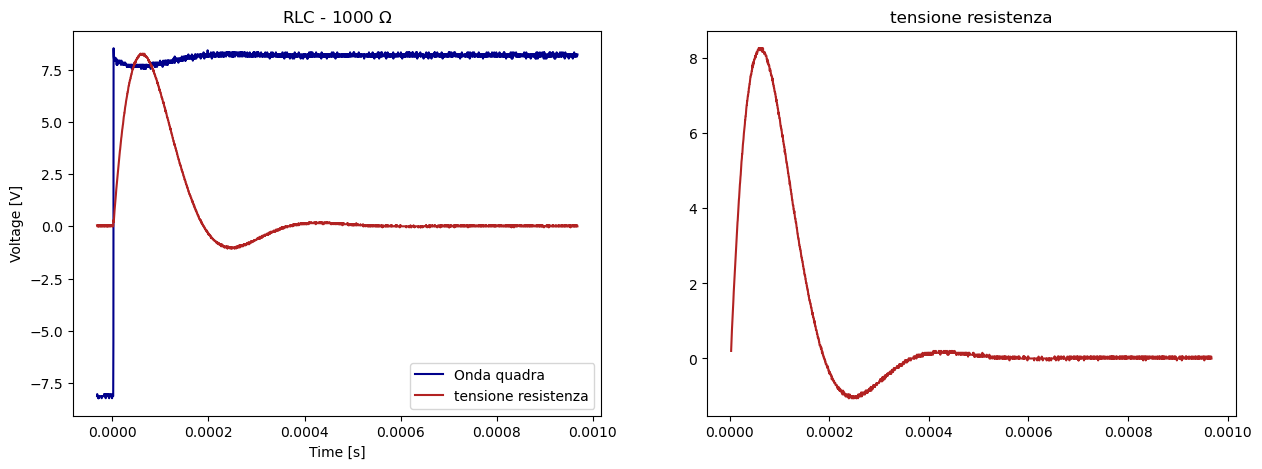

In [61]:
RLC_1000_quadra, RLC_1000_res, RLC_1000_ind = get_data("data/RLC_1000/")
if RLC_1000_ind[1] == None:   RLC_1000_ind = RLC_1000_quadra[0], (RLC_1000_quadra[1] - RLC_1000_res[1])

cut = True

i = 0
if cut:
    v = RLC_1000_quadra[1][0]
    while(v < np.max(RLC_1000_quadra[1][:1000])):
        v = RLC_1000_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1000 $\Omega$')
plt.plot(RLC_1000_quadra[0][:],RLC_1000_quadra[1][:], c='darkblue')
plt.plot(RLC_1000_res[0][:],  RLC_1000_res[1][:],   c='firebrick')
# plt.plot(RLC_1000_ind[0][:],  RLC_1000_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1000_res[0][i:],  RLC_1000_res[1][i:],   c='firebrick')

In [62]:
c = LeastSquares(RLC_1000_res[0][87:], RLC_1000_res[1][87:], 0.01, V_sott)
m = Minuit(c, R=1000+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 9.416e+06 (χ²/ndof = 3910.4)│              Nfcn = 111              │
│ EDM = 0.000153 (Goal: 0.0002)    │            time = 0.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │   942.4   │    1.0    │            │            │         │         │       │
│ 1 │ L    │ 76.24e-3  │  0.08e-3  │            │            │         │         │       │
│ 2 │ C    │ 62.36e-9  │  0.07e-9  │            │            │         │         │       │
│ 3 │ V_o  │  11.5081  │  0.0021   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────────────┐
│     │                 R                 L                 C               V_o │
├─────┼─────────────────────────────────────────────────────────────────────────┤
│   R │              1.06         84.832e-6 -68.786702660e-12           -167e-6 │
│   L │         84.832e-6          6.89e-09     -5.611954e-15              0e-9 │
│   C │ -68.786702660e-12     -5.611954e-15          4.68e-21    -15.317742e-15 │
│ V_o │           -167e-6              0e-9    -15.317742e-15          4.32e-06 │
└─────┴─────────────────────────────────────────────────────────────────────────┘

# R = 1400 $\Omega$

237


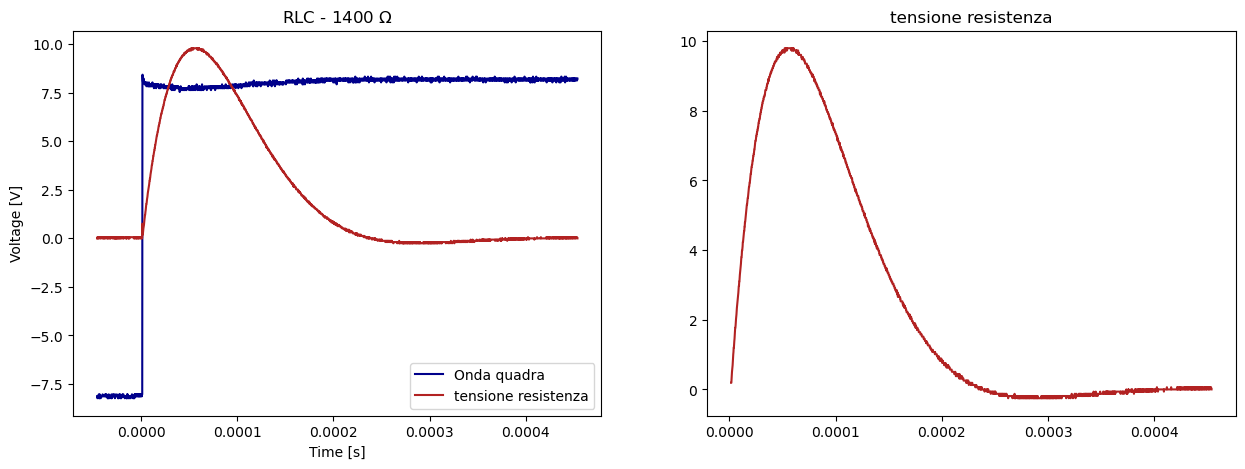

In [68]:
RLC_1400_quadra, RLC_1400_res, RLC_1400_ind = get_data("data/RLC_1400/")
if RLC_1400_ind[1] == None:   RLC_1400_ind = RLC_1400_quadra[0], (RLC_1400_quadra[1] - RLC_1400_res[1])

cut = True

i = 0
if cut:
    v = RLC_1400_quadra[1][0]
    while(v < np.max(RLC_1400_quadra[1][:1400])):
        v = RLC_1400_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1400 $\Omega$')
plt.plot(RLC_1400_quadra[0][:],RLC_1400_quadra[1][:], c='darkblue')
plt.plot(RLC_1400_res[0][:],  RLC_1400_res[1][:],   c='firebrick')
# plt.plot(RLC_1400_ind[0][:],  RLC_1400_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1400_res[0][i:],  RLC_1400_res[1][i:],   c='firebrick')

In [72]:
c = LeastSquares(RLC_1400_res[0][237:], RLC_1400_res[1][237:], 0.01, V_crit)
m = Minuit(c, R=1400+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.fixed['C','R'] = True
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.109e+06 (χ²/ndof = 3145.4)│              Nfcn = 110              │
│ EDM = 5.07e-09 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  1.507e3  │  0.015e3  │            │            │         │         │  yes  │
│ 1 │ L    │35.4161e-3 │ 0.0018e-3 │            │            │         │         │       │
│ 2 │ C    │  49.0e-9  │  0.5e-9   │            │            │         │         │  yes  │
│ 3 │ V_o  │ 814.56e-9 │  0.05e-9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────┐
│     │           R           L           C         V_o │
├─────┼─────────────────────────────────────────────────┤
│   R │           0           0           0           0 │
│   L │           0    3.43e-12           0 39.4880e-18 │
│   C │           0           0           0           0 │
│ V_o │           0 39.4880e-18           0    2.11e-21 │
└─────┴─────────────────────────────────────────────────┘

# R = 1500 $\Omega$

237


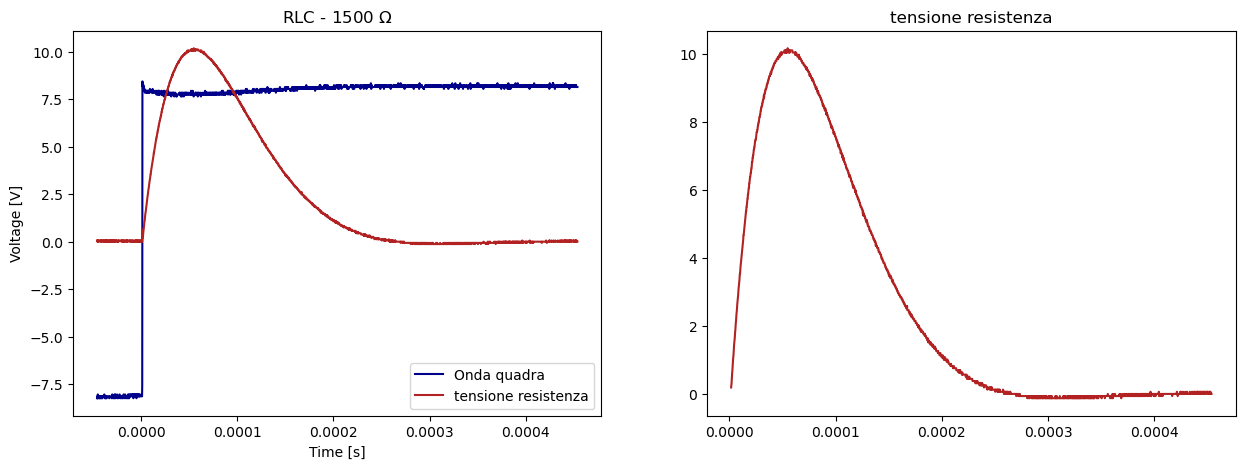

In [73]:
RLC_1500_quadra, RLC_1500_res, RLC_1500_ind = get_data("data/RLC_1500/")
if RLC_1500_ind[1] == None:   RLC_1500_ind = RLC_1500_quadra[0], (RLC_1500_quadra[1] - RLC_1500_res[1])

cut = True

i = 0
if cut:
    v = RLC_1500_quadra[1][0]
    while(v < np.max(RLC_1500_quadra[1][:1500])):
        v = RLC_1500_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1500 $\Omega$')
plt.plot(RLC_1500_quadra[0][:],RLC_1500_quadra[1][:], c='darkblue')
plt.plot(RLC_1500_res[0][:],  RLC_1500_res[1][:],   c='firebrick')
# plt.plot(RLC_1500_ind[0][:],  RLC_1500_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1500_res[0][i:],  RLC_1500_res[1][i:],   c='firebrick')

In [75]:
c = LeastSquares(RLC_1500_res[0][237:], RLC_1500_res[1][237:], 0.01, V_crit)
m = Minuit(c, R=1500+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.853e+06 (χ²/ndof = 2149.1)│              Nfcn = 197              │
│ EDM = 2.33e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  784.177  │   0.021   │            │            │         │         │       │
│ 1 │ L    │18.7004e-3 │ 0.0012e-3 │            │            │         │         │       │
│ 2 │ C    │    0.0    │    1.4    │            │            │         │         │       │
│ 3 │ V_o  │1.64315e-6 │0.00009e-6 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────┐
│     │               R               L               C             V_o │
├─────┼─────────────────────────────────────────────────────────────────┤
│   R │        0.000453      16.4855e-9               0 -408.932878e-15 │
│   L │      16.4855e-9        1.45e-12               0      18.647e-18 │
│   C │               0               0               2           0e-21 │
│ V_o │ -408.932878e-15      18.647e-18           0e-21         7.7e-21 │
└─────┴─────────────────────────────────────────────────────────────────┘

# R = 1540 $\Omega$

237


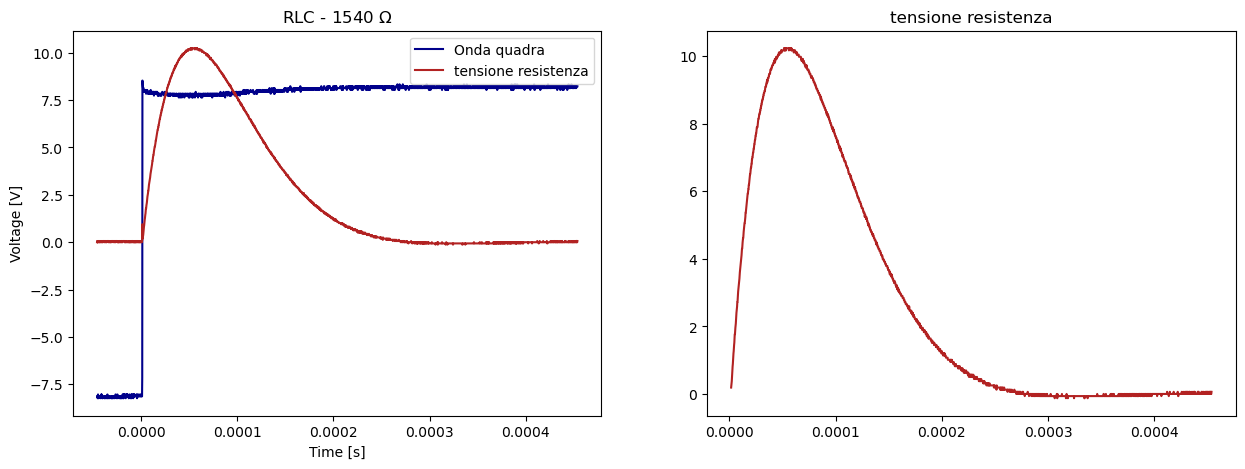

In [76]:
RLC_1540_quadra, RLC_1540_res, RLC_1540_ind = get_data("data/RLC_1540/")
if RLC_1540_ind[1] == None:   RLC_1540_ind = RLC_1540_quadra[0], (RLC_1540_quadra[1] - RLC_1540_res[1])

cut = True

i = 0
if cut:
    v = RLC_1540_quadra[1][0]
    while(v < np.max(RLC_1540_quadra[1][:1540])):
        v = RLC_1540_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1540 $\Omega$')
plt.plot(RLC_1540_quadra[0][:],RLC_1540_quadra[1][:], c='darkblue')
plt.plot(RLC_1540_res[0][:],  RLC_1540_res[1][:],   c='firebrick')
# plt.plot(RLC_1540_ind[0][:],  RLC_1540_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1540_res[0][i:],  RLC_1540_res[1][i:],   c='firebrick')

In [78]:
c = LeastSquares(RLC_1540_res[0][237:], RLC_1540_res[1][237:], 0.01, V_crit)
m = Minuit(c, R=1540+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.079e+06 (χ²/ndof = 1806.6)│              Nfcn = 217              │
│ EDM = 1.59e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  786.246  │   0.022   │            │            │         │         │       │
│ 1 │ L    │18.8677e-3 │ 0.0013e-3 │            │            │         │         │       │
│ 2 │ C    │    0.0    │    1.4    │            │            │         │         │       │
│ 3 │ V_o  │1.66960e-6 │0.00009e-6 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────┐
│     │               R               L               C             V_o │
├─────┼─────────────────────────────────────────────────────────────────┤
│   R │        0.000475      19.4533e-9               0 -358.663376e-15 │
│   L │      19.4533e-9        1.58e-12               0      14.940e-18 │
│   C │               0               0               2           0e-21 │
│ V_o │ -358.663376e-15      14.940e-18           0e-21        7.39e-21 │
└─────┴─────────────────────────────────────────────────────────────────┘

# R = 1570 $\Omega$

237


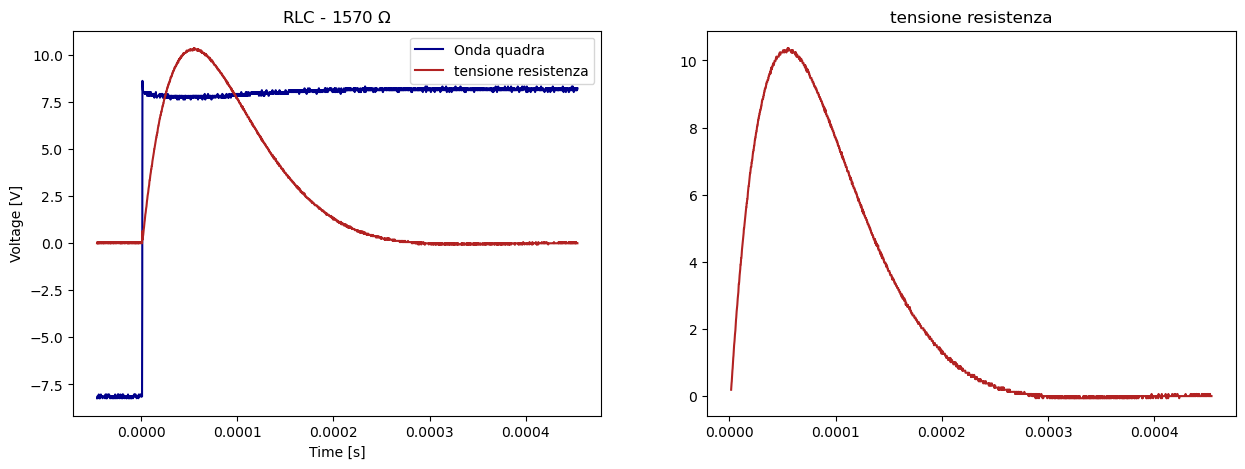

In [79]:
RLC_1570_quadra, RLC_1570_res, RLC_1570_ind = get_data("data/RLC_1570/")
if RLC_1570_ind[1] == None:   RLC_1570_ind = RLC_1570_quadra[0], (RLC_1570_quadra[1] - RLC_1570_res[1])

cut = True

i = 0
if cut:
    v = RLC_1570_quadra[1][0]
    while(v < np.max(RLC_1570_quadra[1][:1570])):
        v = RLC_1570_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 1570 $\Omega$')
plt.plot(RLC_1570_quadra[0][:],RLC_1570_quadra[1][:], c='darkblue')
plt.plot(RLC_1570_res[0][:],  RLC_1570_res[1][:],   c='firebrick')
# plt.plot(RLC_1570_ind[0][:],  RLC_1570_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_1570_res[0][i:],  RLC_1570_res[1][i:],   c='firebrick')

In [81]:
c = LeastSquares(RLC_1570_res[0][237:], RLC_1570_res[1][237:], 0.01, V_crit)
m = Minuit(c, R=1570+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.497e+06 (χ²/ndof = 1548.8)│              Nfcn = 209              │
│ EDM = 9.28e-10 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │  839.54   │   0.02    │            │            │         │         │       │
│ 1 │ L    │20.2327e-3 │ 0.0011e-3 │            │            │         │         │       │
│ 2 │ C    │    0.0    │    1.4    │            │            │         │         │       │
│ 3 │ V_o  │1.58452e-6 │0.00008e-6 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────┐
│     │               R               L               C             V_o │
├─────┼─────────────────────────────────────────────────────────────────┤
│   R │        0.000422      10.5773e-9               0 -348.080451e-15 │
│   L │      10.5773e-9        1.31e-12               0      31.673e-18 │
│   C │               0               0               2           0e-21 │
│ V_o │ -348.080451e-15      31.673e-18           0e-21        6.86e-21 │
└─────┴─────────────────────────────────────────────────────────────────┘

# R = 2000 $\Omega$

67


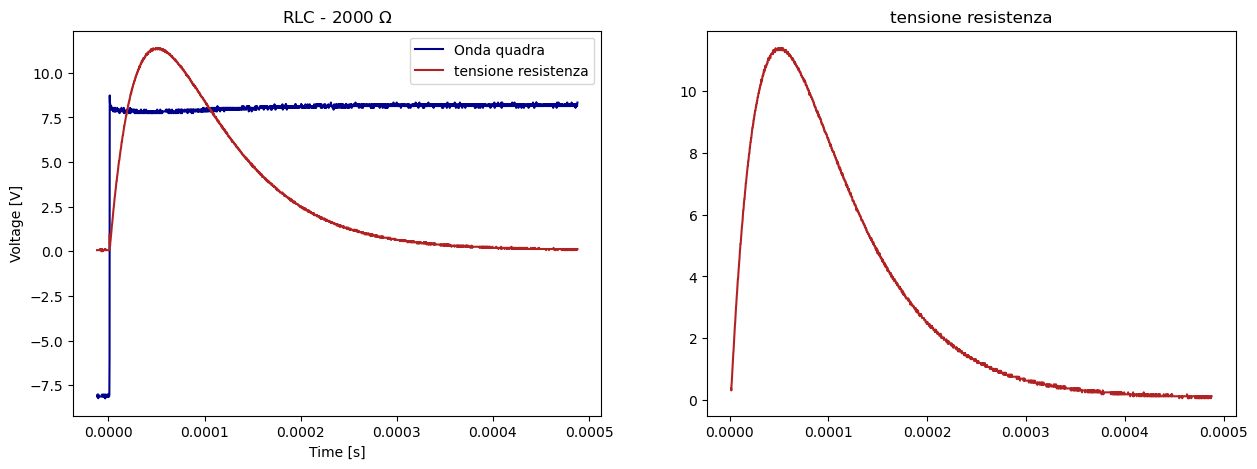

In [82]:
RLC_2000_quadra, RLC_2000_res, RLC_2000_ind = get_data("data/RLC_2000/")
if RLC_2000_ind[1] == None:   RLC_2000_ind = RLC_2000_quadra[0], (RLC_2000_quadra[1] - RLC_2000_res[1])

cut = True

i = 0
if cut:
    v = RLC_2000_quadra[1][0]
    while(v < np.max(RLC_2000_quadra[1][:2000])):
        v = RLC_2000_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 2000 $\Omega$')
plt.plot(RLC_2000_quadra[0][:],RLC_2000_quadra[1][:], c='darkblue')
plt.plot(RLC_2000_res[0][:],  RLC_2000_res[1][:],   c='firebrick')
# plt.plot(RLC_2000_ind[0][:],  RLC_2000_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_2000_res[0][i:],  RLC_2000_res[1][i:],   c='firebrick')

In [85]:
c = LeastSquares(RLC_2000_res[0][67:], RLC_2000_res[1][67:], 0.1, V_crit)
m = Minuit(c, R=2000+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3344 (χ²/ndof = 1.4)       │              Nfcn = 212              │
│ EDM = 1.53e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │ 1.00004e3 │ 0.00023e3 │            │            │         │         │       │
│ 1 │ L    │ 25.860e-3 │ 0.016e-3  │            │            │         │         │       │
│ 2 │ C    │    0.0    │    1.4    │            │            │         │         │       │
│ 3 │ V_o  │ 1.5765e-6 │ 0.0007e-6 │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────────┐
│     │               R               L               C             V_o │
├─────┼─────────────────────────────────────────────────────────────────┤
│   R │          0.0547      2.54621e-6            0.00 -35.3394182e-12 │
│   L │      2.54621e-6        2.47e-10               0      1.9144e-15 │
│   C │            0.00               0               2               0 │
│ V_o │ -35.3394182e-12      1.9144e-15               0         5.3e-19 │
└─────┴─────────────────────────────────────────────────────────────────┘

# R = 3000 $\Omega$

67


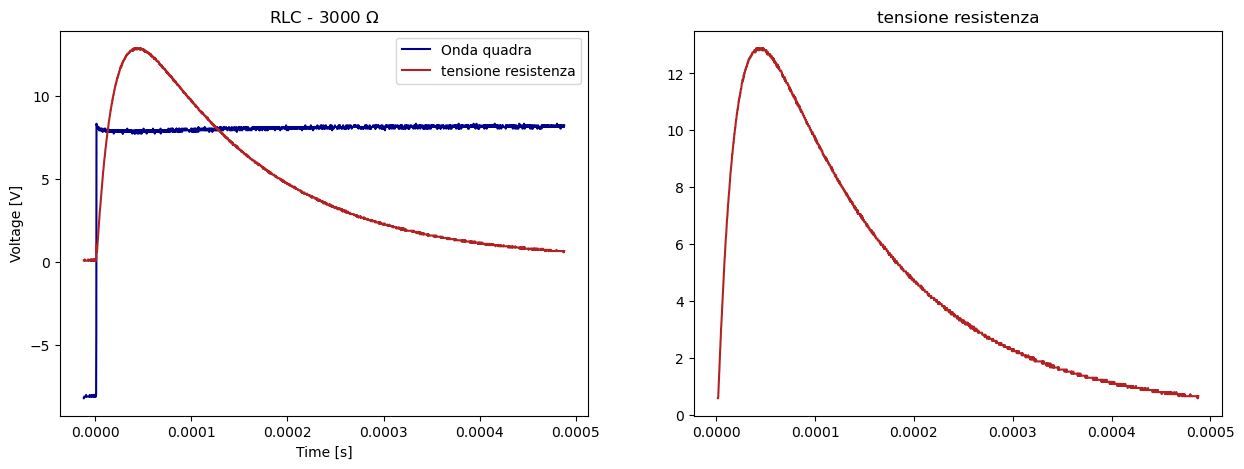

In [86]:
RLC_3000_quadra, RLC_3000_res, RLC_3000_ind = get_data("data/RLC_3000/")
if RLC_3000_ind[1] == None:   RLC_3000_ind = RLC_3000_quadra[0], (RLC_3000_quadra[1] - RLC_3000_res[1])

cut = True

i = 0
if cut:
    v = RLC_3000_quadra[1][0]
    while(v < np.max(RLC_3000_quadra[1][:3000])):
        v = RLC_3000_quadra[1][i]
        i+=1
    print(i)

plt.subplots(1,2, figsize=(15,5))
plt.subplot(121)
plt.title('RLC - 3000 $\Omega$')
plt.plot(RLC_3000_quadra[0][:],RLC_3000_quadra[1][:], c='darkblue')
plt.plot(RLC_3000_res[0][:],  RLC_3000_res[1][:],   c='firebrick')
# plt.plot(RLC_3000_ind[0][:],  RLC_3000_ind[1][:],   c='darkblue')
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.legend(['Onda quadra','tensione resistenza', 'tensione induttore'])

plt.subplot(122)
plt.title('tensione resistenza')
plt.plot(RLC_3000_res[0][i:],  RLC_3000_res[1][i:],   c='firebrick')

In [103]:
c = LeastSquares(RLC_3000_res[0][67:], RLC_3000_res[1][67:], 0.1, V_sovr)
m = Minuit(c, R=3000+R_g+R_L, L=0.060, C=49e-9, V_o=8)
m.limits['R', 'L', 'C'] = (0, np.inf)
m.migrad()

/tmp/ipykernel_8638/64781054.py:18: RuntimeWarning: invalid value encountered in sqrt
  betha = np.sqrt(np.power(gamma,2) - np.power(omega,2))


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 7.23e+20 (χ²/ndof = 297795588531482688.0)│              Nfcn = 384              │
│ EDM = nan (Goal: 0.0002)         │            time = 1.3 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│         INVALID Minimum          │   ABOVE EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ R    │ 2.2144e3  │    nan    │            │            │    0    │         │       │
│ 1 │ L    │   6e-2    │    nan    │            │            │    0    │         │       │
│ 2 │ C    │  4.9e-8   │    nan    │            │            │    0    │         │       │
│ 3 │ V_o  │     8     │    nan    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────┐
│     │   R   L   C V_o │
├─────┼─────────────────┤
│   R │ nan nan nan nan │
│   L │ nan nan nan nan │
│   C │ nan nan nan nan │
│ V_o │ nan nan nan nan │
└─────┴─────────────────┘